<a href="https://colab.research.google.com/github/Auful01/PCVK/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])


def convolution2d(image, kernel, stride, padding):
  # avg = cv.filter2D(image,-1, kernel)
  # cv2_imshow(cv.resize(avg, (0,0),fx=0.5, fy=0.5))
  image = np.pad(image, padding, mode='constant', constant_values = 0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape
  print(padded_height)
  out_height = (padded_height - kernel_height) // stride + 1 
  out_width = (padded_width - kernel_width) // stride + 1 
 
  newImg = np.zeros((out_width, out_height)).astype(np.float32)

  for y in range (0, out_height):
    for x in range (0, out_width):
      newImg[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width ] * kernel).astype(np.float32)
      
  return cv2_imshow(cv.resize(newImg, (0,0), fx=0.5, fy=0.5))

514


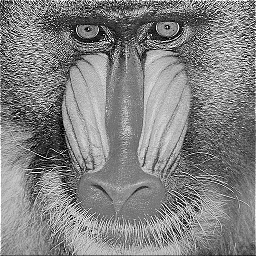

In [ ]:
convolution2d(img_gray, kernel_sharpen, 1, 1)

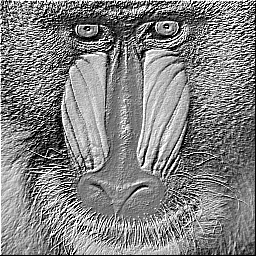

In [ ]:
kernel_Emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])

convolution2d(img_gray, kernel_Emboss, 1, 1)

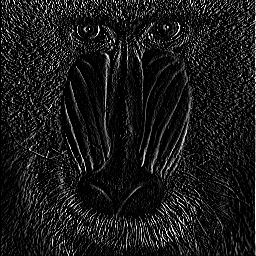

In [ ]:
kernel_left = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])

convolution2d(img_gray, kernel_left, 1, 1)

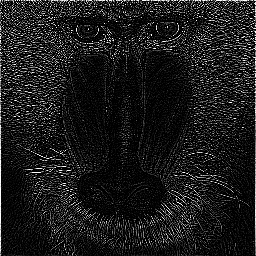

In [ ]:
kernel_canny = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])

convolution2d(img_gray, kernel_canny, 1, 1)

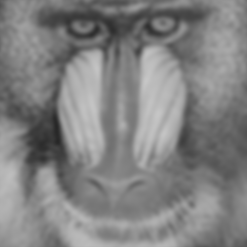

In [ ]:
sigma=math.sqrt(21)
gaussian_kernel = cv.getGaussianKernel(21, sigma)
gauss_kernel = gaussian_kernel @gaussian_kernel.transpose()

convolution2d(img_gray, gauss_kernel, 1, 1)